# Clustering
El _clustering_ (o agrupamiento) es una técnica que nos permite encontrar grupos de similares objetos que están más
relacionados entre
sí que con objetos de otros grupos. Entre los ejemplos de aplicaciones de agrupación en clústeres orientadas a los
negocios se incluyen la agrupación de documentos, música y películas por diferentes temas, o la búsqueda de clientes
que compartan intereses similares en función de comportamientos de compra comunes como base para los motores de
recomendación.

1. K-means
2. Spectral Clustering

## K-means

_K-means_ , es usado ampliamente en el mundo académico y en la industria. Este algoritmo es extremadamente fácil de
implementar, pero también es muy eficiente computacionalmente en comparación con otros algoritmos de agrupamiento.
El algoritmo _k-means_ pertenece a la categoría de agrupamiento basado en prototipos, esto significa que cada grupo
está representado por un prototipo, que puede ser el centroide (promedio) de puntos similares con características
continuas, o el punto más representativo o que ocurre con mayor frecuencia en el caso de características categóricas.
Si bien _k-means_ es muy bueno para identificar grupos de forma esférica, uno de los inconvenientes de este algoritmo
de agrupamiento es que tenemos que especificar el número de grupos $k$ a priori. Una elección inapropiada para $k$ puede
resultar en un rendimiento deficiente del algoritmo.

El algoritmo es muy sencillo:

1. Elegir $k$ centroides de forma aleatoria como centros de _clustering_ iniciales.
2. Asignar cada muestra al centroide más cercano.
3. Mover los centroides al centro de las muestras que le han sido asignadas en el paso anterior.
4. Repetir los pasos 2 y 3 hasta que la asignación del clúster no cambie, se alcance la tolerancia definida por el
usuario o un número máximo de iteraciones.

Uso de k-means en scikit:

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random', n_init=10,  max_iter=300, tol=1e-04, random_state=33)
y_km = km.fit_predict(X)

### Cómo determinamos el número K?

Uno de los principales desafíos del aprendizaje no supervisado es que no conocemos la respuesta definitiva. No
tenemos las etiquetas de clase en nuestro conjunto de datos. Por lo tanto, para cuantificar la calidad del
_clustering_, necesitamos utilizar métricas intrínsecas, como la SSE dentro de la agrupación para
comparar el rendimiento de diferentes agrupaciones.

$ SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} w^{(i,j)} ||x^{(i)} - \mu^{(j)} ||^2 $,

donde $ \mu^{(j)}$ es el centroide del _cluster_ $j$,  y $w^{(i,j)} = 1$ si la muestra $x^{(i)}$ pertenece al
clúster $j$ y $w^{(i,j)} = 0$ en caso contrario.

Convenientemente, no necesitamos calcular el SSE dentro del clúster de manera explícita, ya que ya es accesible a
través del atributo _inertia\__ después de ajustar una instancia del modelo KMeans.

Veamos como podemos usar este atributo para seleccionar el valor adecuado de $k$:

C:\Users\gabri\Anaconda3\envs\MADM2019\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  "KMeans is known to have a memory leak on Windows "


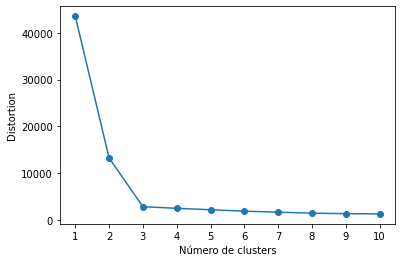

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distortion')
plt.xticks(range(1,11))
plt.show();

## Spectral Clustering

La técnica _spectral clustering_ es muy útil cuando la estructura de los agrupamientos individuales no es muy convexa o, de manera más general, cuando una medida del centro y la dispersión del agrupamiento no es una descripción adecuada del agrupamiento completo. Por ejemplo, cuando los grupos son círculos anidados en el plano 2D. 

Como parámetros más importantes tiene:

   - El número de clusters.
   - `assign_labels`: La tècnica que se usa para asignar las etiquetas. Se puede usar k-means o `discreti`

Uso en Sci-kit:


In [ ]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0)
sc.fit(X)